In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import re 

# Import NLTK to assist with removing the non important words 
import nltk 

from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amandahutter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
os.listdir()

['Lyrics_Database_EDA.ipynb',
 'Similarity_df.csv',
 '.DS_Store',
 'EDA_MusixMatch.ipynb',
 'mxm_dataset.db',
 'mxm_dataset_train.txt',
 'mxm_dataset_test.txt',
 'LastFM_EDA.ipynb',
 'mxm_779k_matches.txt',
 'mxm_database.db',
 '.ipynb_checkpoints',
 'mxm_lyrics.db',
 'how_many_inputs.py']

In [3]:
def read_sqlite(dbfile):
    import sqlite3
    from pandas import read_sql_query, read_sql_table

    with sqlite3.connect(dbfile) as dbcon:
        tables = list(read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name'])
        print("Tables:",tables)
        out = {tbl : read_sql_query(f"SELECT * from {tbl}", dbcon) for tbl in tables}
        
    return(out)

In [4]:
tables =  read_sqlite('mxm_lyrics.db')
#print(tables)

Tables: ['download_history', 'lyrics']


In [5]:
tables =  read_sqlite('mxm_dataset.db')
#print(tables)

Tables: ['words', 'lyrics']


In [6]:
### Kathryn says this one worked: 
import sqlite3
import pandas as pd

# Create your connection.
cnx = sqlite3.connect('mxm_lyrics.db')
lyrics_df = pd.read_sql_query("SELECT * FROM lyrics", cnx)


In [7]:
lyrics_df.head()

,mxm_id,lyrics_id,lyrics,explicit,lyrics_language,lyrics_language_description
0,555821,16701750,The big wheel keeps on turning\nOn a simple li...,0,None,None
1,555832,6069922,I've been searchin' all over for someone\nI ca...,0,None,None
2,555842,6092005,I've found a new baby\nI've found a new girl\n...,0,None,None
3,555901,1691427,I think I'll come over\nI'll give you my numbe...,0,None,None
4,555918,10129918,She's worried she said too much\nAnd talking i...,0,None,None


In [8]:
lyrics_df.shape

(168884, 6)

In [9]:
lyrics_df['mxm_id'].nunique()

168884

In [10]:
lyrics_df['lyrics_id'].nunique()

167806

In [11]:
lyrics_df.isna().sum()

mxm_id                              0
lyrics_id                           0
lyrics                              0
explicit                            0
lyrics_language                168884
lyrics_language_description    168884
dtype: int64

In [12]:
# Add Length of Lyrics to analyze
lyrics_df['lyrics_length'] = lyrics_df['lyrics'].str.split(" ").str.len()

In [13]:
lyrics_df.columns

Index(['mxm_id', 'lyrics_id', 'lyrics', 'explicit', 'lyrics_language',
       'lyrics_language_description', 'lyrics_length'],
      dtype='object')

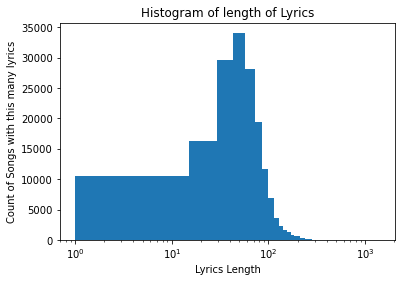

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(lyrics_df['lyrics_length'], bins = 100)
plt.ylabel("Count of Songs with this many lyrics")
plt.xlabel("Lyrics Length")
ax.set_xscale('log')
plt.title("Histogram of length of Lyrics")
plt.show()

In [15]:
lyrics_df['lyrics_length'].describe()

count    168884.000000
mean         61.234540
std          39.270156
min           1.000000
25%          37.000000
50%          55.000000
75%          77.000000
max        1415.000000
Name: lyrics_length, dtype: float64

In [16]:
lyrics_df[lyrics_df['lyrics_length'] == 1415]

,mxm_id,lyrics_id,lyrics,explicit,lyrics_language,lyrics_language_description,lyrics_length
66787,2467236,1255765,"(Big Moe)\nYeee-yeee haahee yeehaa, yeee-yaahe...",1,None,None,1415


In [17]:
lyrics_df.sort_values(by='lyrics_length', ascending=False).head(10)

,mxm_id,lyrics_id,lyrics,explicit,lyrics_language,lyrics_language_description,lyrics_length
66787,2467236,1255765,"(Big Moe)\nYeee-yeee haahee yeehaa, yeee-yaahe...",1,None,None,1415
17629,919544,2204519,"Oh yeah, come on now, oh yeah\nOh yeah, come o...",0,None,None,1290
103994,4711924,1233807,"From Sage Daelun's ""Chronicles of Antediluvia""...",1,None,None,992
17630,919545,2204465,Oh oh. Yeah.\nShoo doo doo doo doo doo.\n\nLas...,0,None,None,943
45819,1627470,1233817,Words gleaned from the Crystal of Memory:\nUpo...,0,None,None,911
11400,804740,5195340,Classes\nI've got something to say about the s...,1,None,None,744
21021,990208,73155,"""Alright, everybody. We're here in Los Angeles...",1,None,None,650
167681,12697217,7775482,"L'encre coule, le sang se répand\nLa feuille b...",1,None,None,589
103998,4711928,5399333,[Fragmentary delusional recollections from wit...,0,None,None,522
127517,6338543,25127099,J'suis né poussière et j'repartirai poussière\...,1,None,None,507


In [18]:
lyrics_ex = lyrics_df['lyrics'][0]
lyrics_ex

"The big wheel keeps on turning\nOn a simple line, day by day\nThe earth spins on its axis\nOne man struggle while another relaxes\n\nThere's a hole in my soul like a cavity\nSeems the world is out to gather just by gravity\nThe wheel keeps turning, the sky's rearranging\nLook, my son, the weather is changing\n\nI'd like to feel that you could be free\nLook up at the blue skies beneath a new tree\nSometime again, you'll turn green, and the sea turns red\nMy son, I said, the power of reflections over my head\n\nThe big wheel keeps on turning\nOn a simple line, day by day\nThe earth spins on its axis\nOne man struggle while another relaxes\n...\n\n"

#### Should we clean lyrics upon reading in? Something we will need to do before LSTM 

In [19]:
print(lyrics_df.iloc[0]['lyrics'])

# Remove the non important words 
lyrics = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = lyrics_df.iloc[0]['lyrics']) 
print(lyrics)

# Lowercase  
lyrics = lyrics.lower()
print(lyrics)

# Split string
lyrics = lyrics.split()
print(lyrics)

# Make Porter stemmer to stem our words, to remove suffix & prefix
ps = PorterStemmer()

# Keep the words in the list that are not in the Stopwords list 
lyrics = [ps.stem(word) for word in lyrics if not word in set(stopwords.words('english'))]
print(lyrics)

# Convert back to string 
lyrics = ' '.join(lyrics)
print(lyrics)

The big wheel keeps on turning
On a simple line, day by day
The earth spins on its axis
One man struggle while another relaxes

There's a hole in my soul like a cavity
Seems the world is out to gather just by gravity
The wheel keeps turning, the sky's rearranging
Look, my son, the weather is changing

I'd like to feel that you could be free
Look up at the blue skies beneath a new tree
Sometime again, you'll turn green, and the sea turns red
My son, I said, the power of reflections over my head

The big wheel keeps on turning
On a simple line, day by day
The earth spins on its axis
One man struggle while another relaxes
...


The big wheel keeps on turning On a simple line  day by day The earth spins on its axis One man struggle while another relaxes  There s a hole in my soul like a cavity Seems the world is out to gather just by gravity The wheel keeps turning  the sky s rearranging Look  my son  the weather is changing  I d like to feel that you could be free Look up at the blue skie

In [20]:
def clean_lower_stem(lyrics):

    # Remove the non important words 
    lyrics = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = lyrics) 

    # Lowercase  
    lyrics = lyrics.lower()
    
    # Split string
    lyrics = lyrics.split()
    
    # Make Porter stemmer to stem our words, to remove suffix & prefix
    ps = PorterStemmer()

    # Keep the words in the list that are not in the Stopwords list 
    lyrics = [ps.stem(word) for word in lyrics if not word in set(stopwords.words('english'))]
    
    # Convert back to string 
    lyrics = ' '.join(lyrics)
    
    return lyrics 
    

### Practice on Subset of Data 

In [21]:
small_df = lyrics_df[(lyrics_df['lyrics_length'] > 70) & (lyrics_df['lyrics_length'] < 80 )]

In [22]:
small_df.shape

(13911, 7)

In [23]:
small_df['lyrics_clean'] = small_df['lyrics'].apply(clean_lower_stem)

/Users/amandahutter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
small_df.head()

,mxm_id,lyrics_id,lyrics,explicit,lyrics_language,lyrics_language_description,lyrics_length,lyrics_clean
18,555949,22847702,"I can't stand it, I know you planned it\nI'm g...",1,None,None,78,stand know plan gonna set straight waterg stan...
70,556540,1252240,"Where have you gone, my Rosealia?\nInto the cr...",0,None,None,77,gone rosealia crowd never find ya walk real fa...
77,556650,4122121,"Well, i never was good at bein' good\nI was ne...",1,None,None,72,well never good bein good never kind said one ...
100,556816,21678451,"All last summer, in case you don't recall\nI w...",0,None,None,77,last summer case recal mine forget line could ...
108,556860,1206201,What is your one purpose in life?\nWhat is you...,0,None,None,77,one purpos life one purpos life one purpos lif...


### Add MXM Dataset 

In [25]:
# Create your connection.
cnx = sqlite3.connect('mxm_dataset.db') # words, lyrics (table options)
#words_df = pd.read_sql_query("SELECT * FROM words", cnx)
mxm_lyrics_df = pd.read_sql_query("SELECT * FROM lyrics", cnx)

In [26]:
#words_df.shape

In [27]:
#words_df.head()

In [28]:
mxm_lyrics_df.shape

(19045332, 5)

In [29]:
mxm_lyrics_df.head()

,track_id,mxm_tid,word,count,is_test
0,TRAAAAV128F421A322,4623710,i,6,0
1,TRAAAAV128F421A322,4623710,the,4,0
2,TRAAAAV128F421A322,4623710,you,2,0
3,TRAAAAV128F421A322,4623710,to,2,0
4,TRAAAAV128F421A322,4623710,and,5,0


In [30]:
unique_ids =  mxm_lyrics_df[['track_id', 'mxm_tid']].drop_duplicates(subset=['track_id', 'mxm_tid'])

In [31]:
unique_ids.shape

(237662, 2)

In [32]:
unique_ids.head()

,track_id,mxm_tid
0,TRAAAAV128F421A322,4623710
68,TRAAABD128F429CF47,6477168
142,TRAAAED128E0783FAB,2516445
262,TRAAAEF128F4273421,3759847
321,TRAAAEW128F42930C0,3783760


In [33]:
unique_ids['msd_id'] = unique_ids['track_id']
unique_ids['mxm_id'] = unique_ids['mxm_tid']
unique_ids.drop(columns=['track_id', 'mxm_tid'], inplace = True)


In [34]:
unique_ids.head()

,msd_id,mxm_id
0,TRAAAAV128F421A322,4623710
68,TRAAABD128F429CF47,6477168
142,TRAAAED128E0783FAB,2516445
262,TRAAAEF128F4273421,3759847
321,TRAAAEW128F42930C0,3783760


In [35]:
#small_df =  small_df.merge(unique_ids, how='inner', on='mxm_id')
lyrics_df =  lyrics_df.merge(unique_ids, how='inner', on='mxm_id')

In [36]:
#small_df.head()
lyrics_df.head()

,mxm_id,lyrics_id,lyrics,explicit,lyrics_language,lyrics_language_description,lyrics_length,msd_id
0,555821,16701750,The big wheel keeps on turning\nOn a simple li...,0,None,None,108,TRXISWJ128F42ACCF9
1,555832,6069922,I've been searchin' all over for someone\nI ca...,0,None,None,49,TRFCZMA128F92CD5F8
2,555842,6092005,I've found a new baby\nI've found a new girl\n...,0,None,None,27,TROVDLK128F93271B2
3,555901,1691427,I think I'll come over\nI'll give you my numbe...,0,None,None,32,TRECMQY128E0781143
4,555918,10129918,She's worried she said too much\nAnd talking i...,0,None,None,46,TRWMCCR128F4268FC1


## Get similarity_df > from LastFM_EDA.ipynb 

In [37]:
similarity_df =  pd.read_csv('Similarity_df.csv')

In [38]:
similarity_df.shape

(3985913, 3)

In [39]:
similarity_df.head()

,Track1,Track2,Similarity
0,TRRRRCH128F9342C72,TRMLOXQ12903CF06BB,1.000000
1,TRRRRCH128F9342C72,TRCOWHF128F932163D,1.000000
2,TRRRRCH128F9342C72,TRRWESB128F92E08E4,1.000000
3,TRRRRCH128F9342C72,TRNJNJS128E0793567,1.000000
4,TRRRRCH128F9342C72,TRHJVGH12903CB1529,0.950061


In [40]:
# Reduce to pairs that have stronger similarity 
similarity_df = similarity_df[similarity_df['Similarity'] > .50]

In [41]:
similarity_df.shape

(2625696, 3)

In [42]:
# Get Random Selections for Training Model 
np.random.seed(42)
random_inds = np.random.choice(len(similarity_df), 7000, replace = False)
train_inds = random_inds[:5000]
test_inds = random_inds[5000:]

In [43]:
# 5000 Training, 2000 Test, Song pairs that are all SIMILAR to train LSTM 
train_sim = similarity_df.iloc[train_inds]
test_sim = similarity_df.iloc[test_inds]

In [44]:
print(train_sim.shape)
print(test_sim.shape)

(5000, 3)
(2000, 3)


In [45]:
train_sim.head(12)

,Track1,Track2,Similarity
3544921,TRYNFBF128F428F432,TRXWXIN128EF34A5F2,0.965991
769032,TRZROGG12903CE9393,TRZYKVX12903CE93DE,1.000000
3388459,TRLIXGV128F9314EC1,TRWBRME128F4295FC4,0.777892
190267,TRUTGMA12903CFEC21,TRPNXBV128F146E51E,0.840061
167065,TRUIFZY128F42858FC,TRRGUWH128F42858F4,1.000000
1668592,TROLOXG128F4229E20,TRYZTBQ128F4229E1A,1.000000
3649943,TRYBKOT128F148D14B,TRQGEAE128E078992A,0.956417
2193749,TRCSGBC128F42791FC,TRUONWL128F425F670,0.715533
3562346,TRYTSXE128F92E5DF4,TRNHDDV128EF3620D9,0.757188
1163323,TRSVOJC12903CCE677,TRLHQVA128F9323D0E,0.613760


In [46]:
# Issue: Not many song pairs have lyrics 
#small_df[small_df['msd_id'] == 'TRLHQVA128F9323D0E'] 
lyrics_df[lyrics_df['msd_id'] == 'TRLHQVA128F9323D0E']

,mxm_id,lyrics_id,lyrics,explicit,lyrics_language,lyrics_language_description,lyrics_length,msd_id
